In [168]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
train_df=pd.read_csv('C:\\Users\\thehockey_freak!\\Documents\\Nuclei\\Project2\\train.csv')
test_df=pd.read_csv('C:\\Users\\thehockey_freak!\\Documents\\Nuclei\\Project2\\test.csv')
combine=[train_df,test_df]

In [170]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
train_df.shape

(891, 12)

In [172]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [175]:
train_df['Embarked'].fillna('S',inplace=True)
train_df['Embarked'].isnull().sum()

0

In [176]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [177]:
train_df.drop(['PassengerId','Cabin'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [178]:
train_df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [179]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


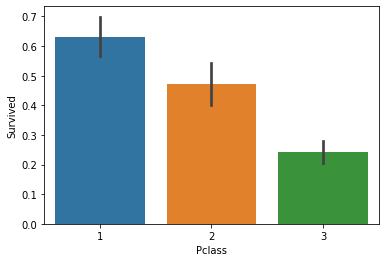

In [180]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

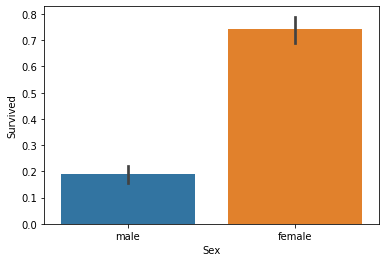

In [181]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

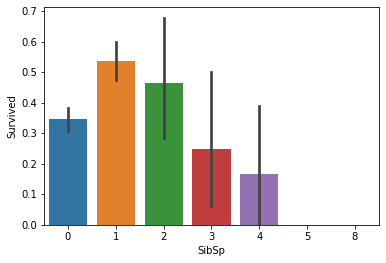

In [182]:
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.show()

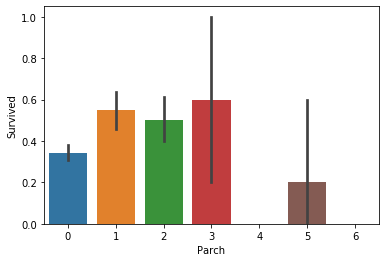

In [183]:
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.show()

In [184]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print('-----')
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
print('-----')
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean())
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-----
      Sex  Survived
0  female  0.742038
1    male  0.188908
-----
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


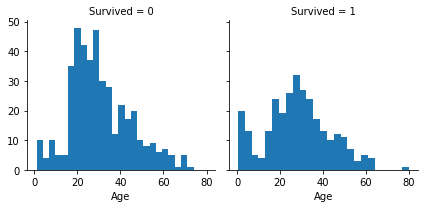

In [185]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=25)

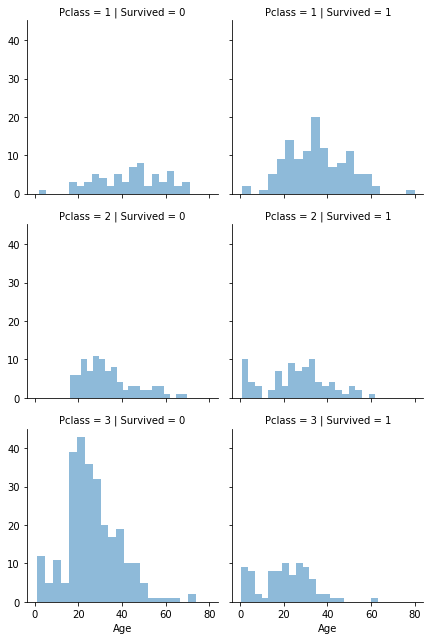

In [186]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

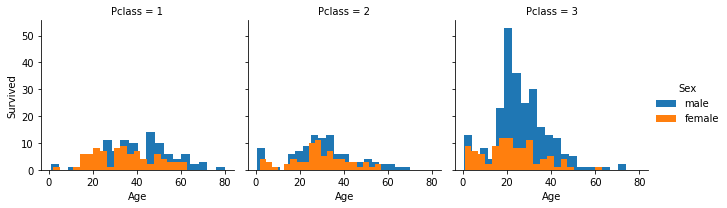

In [187]:
g = sns.FacetGrid(train_df, col="Pclass", hue="Sex")
g.map(plt.hist, 'Age', bins=20)
g.set_axis_labels("Age", "Survived")
g.add_legend()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


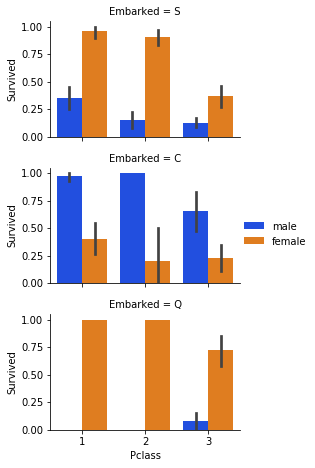

In [188]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Pclass','Survived', 'Sex',palette="bright")
grid.add_legend()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


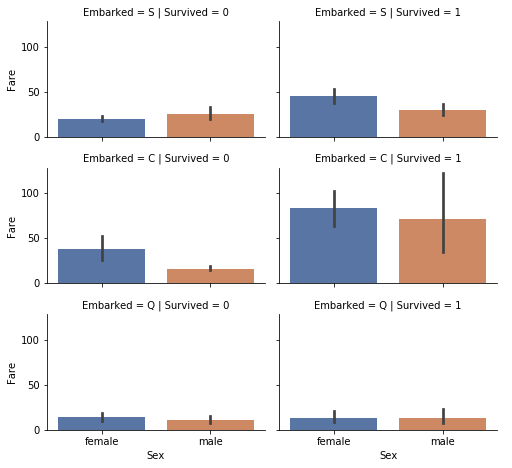

In [189]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare',palette="deep")
grid.add_legend()

In [190]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [191]:
test_df=pd.read_csv('C:\\Users\\thehockey_freak!\\Documents\\Nuclei\\Project2\\test.csv')
#test_df = test_df.drop(['Ticket', 'Cabin'], axis=1,inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [192]:
#test_df.drop('Cabin', axis=1,inplace=True)
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [193]:
test_df.drop('Ticket',axis=1,inplace=True)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [194]:
test_df.drop('Cabin',axis=1,inplace=True)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [195]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [196]:
train_df.drop('Ticket',axis=1,inplace=True)

In [197]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [198]:
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 9) (418, 9) (891, 9) (418, 9)


In [199]:
for dataset in combine:
 dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [200]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [201]:
for dataset in combine:
 dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [202]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


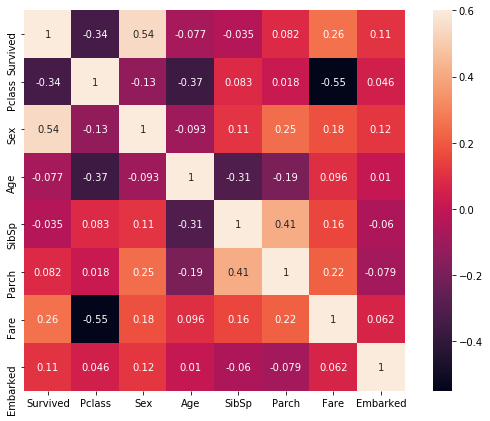

In [203]:
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(), vmax=0.6, square=True, annot=True)

In [204]:
for dataset in combine:
    mean_age = train_df['Age'].mean()
    std_age = train_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    rand = np.random.randint(mean_age - std_age, mean_age + std_age, size = is_null)
    
    age_fill = dataset['Age'].copy()
    age_fill[np.isnan(age_fill)] = rand
    dataset['Age'] = age_fill
    dataset['Age'] = train_df['Age'].astype(int)

In [205]:
train_df['Age'].isnull().sum()

0

In [206]:

for dataset in combine:
    dataset['family'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['family'] > 0, 'alone'] = 'No'
    dataset.loc[dataset['family'] == 0, 'alone'] = 'Yes'

In [207]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,0,1,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,1,1,No
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,0,0,Yes
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,0,1,No
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,0,0,Yes


In [208]:
train_df.drop(['SibSp','Parch'],axis=1,inplace=True)
test_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [209]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family,alone
0,0,3,"Braund, Mr. Owen Harris",0,22,7.2500,0,1,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71.2833,1,1,No
2,1,3,"Heikkinen, Miss. Laina",1,26,7.9250,0,0,Yes
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53.1000,0,1,No
4,0,3,"Allen, Mr. William Henry",0,35,8.0500,0,0,Yes


In [210]:
for dataset in combine:
 dataset['alone'] = dataset['alone'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [211]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family,alone
0,0,3,"Braund, Mr. Owen Harris",0,22,7.2500,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71.2833,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53.1000,0,1,0
4,0,3,"Allen, Mr. William Henry",0,35,8.0500,0,0,1


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


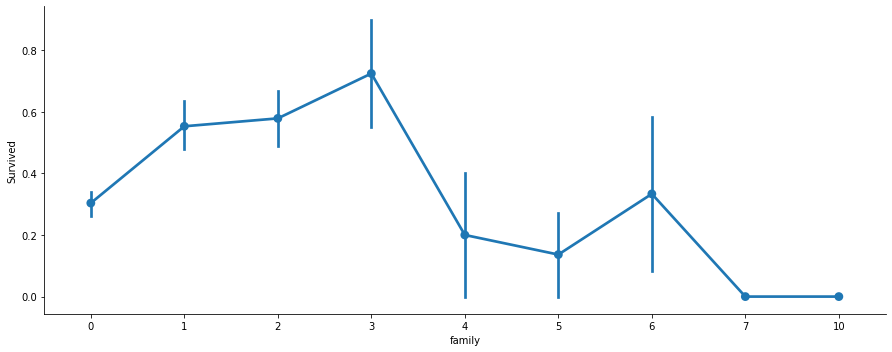

In [212]:
axes = sns.factorplot('family','Survived', 
                      data=train_df, aspect = 2.5, )

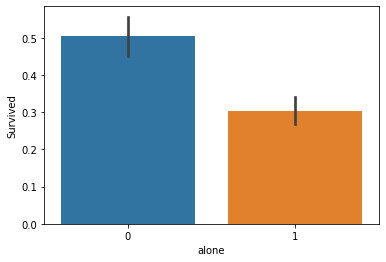

In [213]:
sns.barplot(x='alone', y='Survived', data=train_df)
plt.show()

In [214]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.521008
1,"(16.0, 32.0]",0.353881
2,"(32.0, 48.0]",0.370079
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [215]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family,alone,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,22,7.2500,0,1,0,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71.2833,1,1,0,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,26,7.9250,0,0,1,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53.1000,0,1,0,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,35,8.0500,0,0,1,"(32.0, 48.0]"


In [216]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family,alone,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,1,0,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,1,0,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,0,1,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,1,0,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,0,1,"(32.0, 48.0]"


In [217]:
train_df.drop('AgeBand',axis=1,inplace=True)

In [218]:
train_df.drop('family',axis=1,inplace=True)

In [219]:
test_df['Fare'].isnull().sum()

1

In [220]:
test_df['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [228]:
#md = test_df['Fare'].mode()
test_df['Fare'].fillna(7.7500,inplace=True)

In [229]:
test_df['Fare'].isnull().sum()

0

In [232]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age           int32
Fare        float64
Embarked      int32
alone         int32
dtype: object

In [233]:
for dataset in combine:
 dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [234]:
for dataset in combine:
 dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [236]:
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [237]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mlle,1.000000
3,Mme,1.000000
4,Mr,0.156673
5,Mrs,0.792000
6,Ms,1.000000
7,Other,0.347826


In [239]:
#train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).median()
title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

In [240]:
for dataset in combine:
 dataset['Title'] = dataset['Title'].map(title_map)
 dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,0,3.0
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,1,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,0,3.0
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,1.0


In [241]:
train_df.drop('Name',axis=1,inplace=True)

In [242]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,alone,Title
0,0,3,0,1,7.2500,0,0,1.0
1,1,1,1,2,71.2833,1,0,3.0
2,1,3,1,1,7.9250,0,1,2.0
3,1,1,1,2,53.1000,0,0,3.0
4,0,3,0,2,8.0500,0,1,1.0


In [243]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age           int32
Fare        float64
Embarked      int32
alone         int32
Title       float64
dtype: object

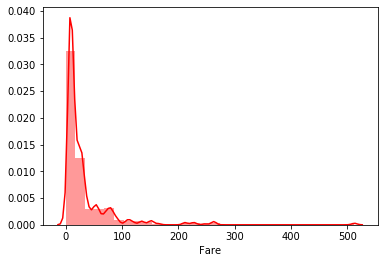

In [244]:

plt.figure()
sns.distplot(train_df.Fare,bins=30, color='r')

plt.show()

In [248]:
res=np.sqrt(train_df['Fare'])
train_df['Fare_Sqrt']=res

In [249]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,alone,Title,Fare_Sqrt
0,0,3,0,1,7.2500,0,0,1.0,2.692582
1,1,1,1,2,71.2833,1,0,3.0,8.442944
2,1,3,1,1,7.9250,0,1,2.0,2.815138
3,1,1,1,2,53.1000,0,0,3.0,7.286975
4,0,3,0,2,8.0500,0,1,1.0,2.837252


In [250]:
train_df = pd.get_dummies(train_df, columns=['Pclass','Sex'], drop_first=True)
train_df.head()

,Survived,Age,Fare,Embarked,alone,Title,Fare_Sqrt,Pclass_2,Pclass_3,Sex_1
0,0,1,7.2500,0,0,1.0,2.692582,0,1,0
1,1,2,71.2833,1,0,3.0,8.442944,0,0,1
2,1,1,7.9250,0,1,2.0,2.815138,0,1,1
3,1,2,53.1000,0,0,3.0,7.286975,0,0,1
4,0,2,8.0500,0,1,1.0,2.837252,0,1,0


NameError: name 'stats' is not defined

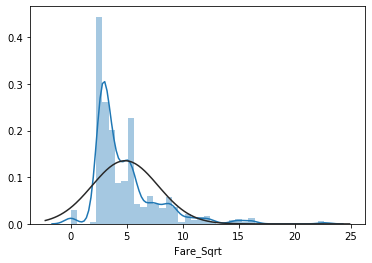

<Figure size 432x288 with 0 Axes>

In [252]:

from scipy.stats import norm
sns.distplot(train_df['Fare_Sqrt'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['Fare_Sqrt'], plot=plt)

In [253]:
train_df.drop('Fare_Sqrt',axis=1,inplace=True)

In [254]:
train_df.head()

,Survived,Age,Fare,Embarked,alone,Title,Pclass_2,Pclass_3,Sex_1
0,0,1,7.2500,0,0,1.0,0,1,0
1,1,2,71.2833,1,0,3.0,0,0,1
2,1,1,7.9250,0,1,2.0,0,1,1
3,1,2,53.1000,0,0,3.0,0,0,1
4,0,2,8.0500,0,1,1.0,0,1,0


In [255]:
#X_train = train_df.drop("Survived", axis=1)
#Y_train = train_df["Survived"]
#X_test = test_df.drop("PassengerId", axis=1).copy()

In [257]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family,alone,Title
0,892,3,"Kelly, Mr. James",0,1,7.8292,2,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,7.0000,0,1,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,1,9.6875,2,0,1,1
3,895,3,"Wirz, Mr. Albert",0,2,8.6625,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2,12.2875,0,2,0,3


In [258]:
train_df.head()

,Survived,Age,Fare,Embarked,alone,Title,Pclass_2,Pclass_3,Sex_1
0,0,1,7.2500,0,0,1.0,0,1,0
1,1,2,71.2833,1,0,3.0,0,0,1
2,1,1,7.9250,0,1,2.0,0,1,1
3,1,2,53.1000,0,0,3.0,0,0,1
4,0,2,8.0500,0,1,1.0,0,1,0


In [259]:
test_df.drop('family',axis=1,inplace=True)

In [260]:
test_df.drop('Name',axis=1,inplace=True)

In [261]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,alone,Title
0,892,3,0,1,7.8292,2,1,1
1,893,3,1,2,7.0000,0,0,3
2,894,2,0,1,9.6875,2,1,1
3,895,3,0,2,8.6625,0,1,1
4,896,3,1,2,12.2875,0,0,3


ValueError: X has 7 features per sample; expecting 8

In [271]:
train_df.head()

,Survived,Age,Fare,Embarked,alone,Title,Pclass_2,Pclass_3,Sex_1
0,0,1,7.2500,0,0,1.0,0,1,0
1,1,2,71.2833,1,0,3.0,0,0,1
2,1,1,7.9250,0,1,2.0,0,1,1
3,1,2,53.1000,0,0,3.0,0,0,1
4,0,2,8.0500,0,1,1.0,0,1,0


In [273]:
test_df = pd.get_dummies(test_df, columns=['Pclass','Sex'], drop_first=True)
test_df.head()

,PassengerId,Age,Fare,Embarked,alone,Title,Pclass_2,Pclass_3,Sex_1
0,892,1,7.8292,2,1,1,0,1,0
1,893,2,7.0000,0,0,3,0,1,1
2,894,1,9.6875,2,1,1,1,0,0
3,895,2,8.6625,0,1,1,0,1,0
4,896,2,12.2875,0,0,3,0,1,1


In [275]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
logreg.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
Y_pred = logreg.predict(X_test)

In [279]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [281]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
